In [1]:
# required libs for data wrangling
import pandas as pd
import numpy as np
import missingno
from collections import Counter

#data visualization tools
import seaborn as sns
import matplotlib.pyplot as plt

#machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

#model evaluation
from sklearn.model_selection import cross_val_score

#hyper parameter tuning
from sklearn.model_selection import GridSearchCV

#remove all warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import the neccessary data: train test and gender
train = pd.read_csv('/home/machio_b/Documents/Data_Sets/kaggle-titanic/train.csv')
test = pd.read_csv('/home/machio_b/Documents/Data_Sets/kaggle-titanic/test.csv')
ss = pd.read_csv('/home/machio_b/Documents/Data_Sets/kaggle-titanic/gender_submission.csv')

In [3]:
train.head()
test.head()
ss.head()

print('training:', train.shape , 'testing: ',test.shape)

training: (891, 12) testing:  (418, 11)


EDA : Exploratory Data Analysis

Visualize Data and Extract Insight of our data set

In [4]:
train.info()
#test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

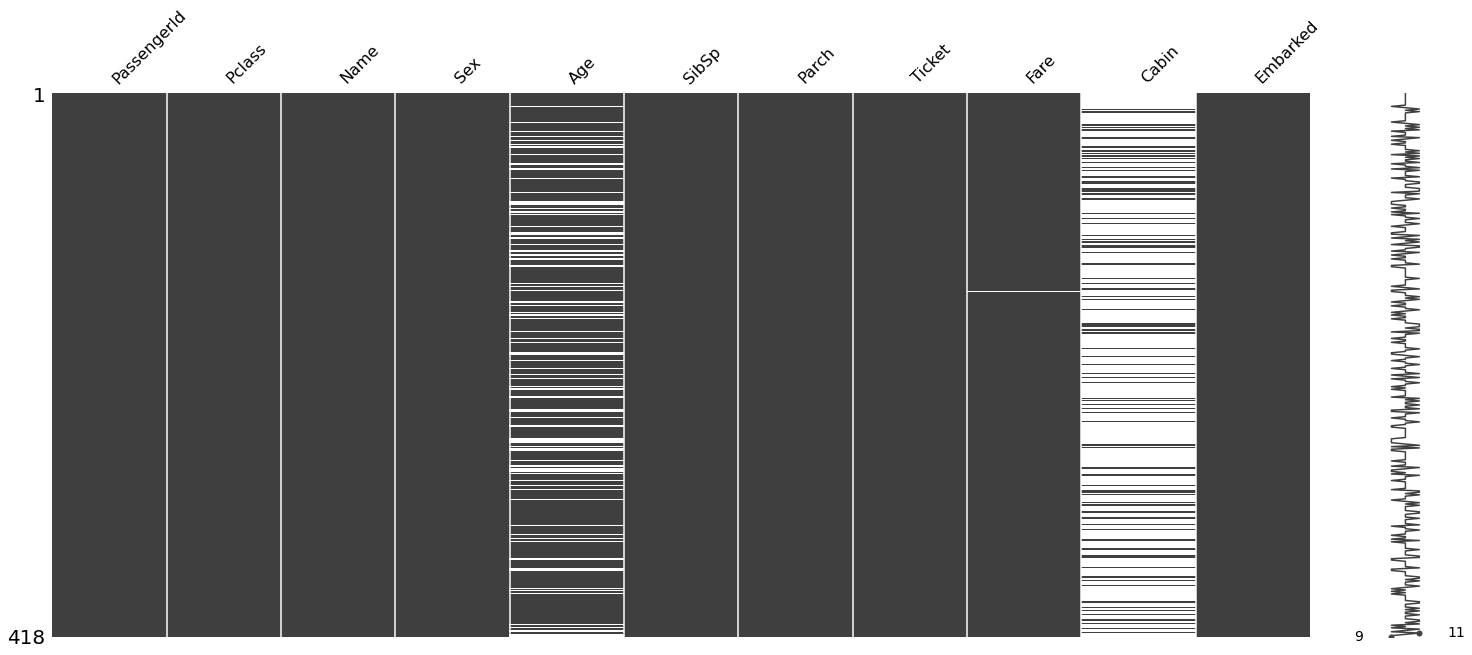

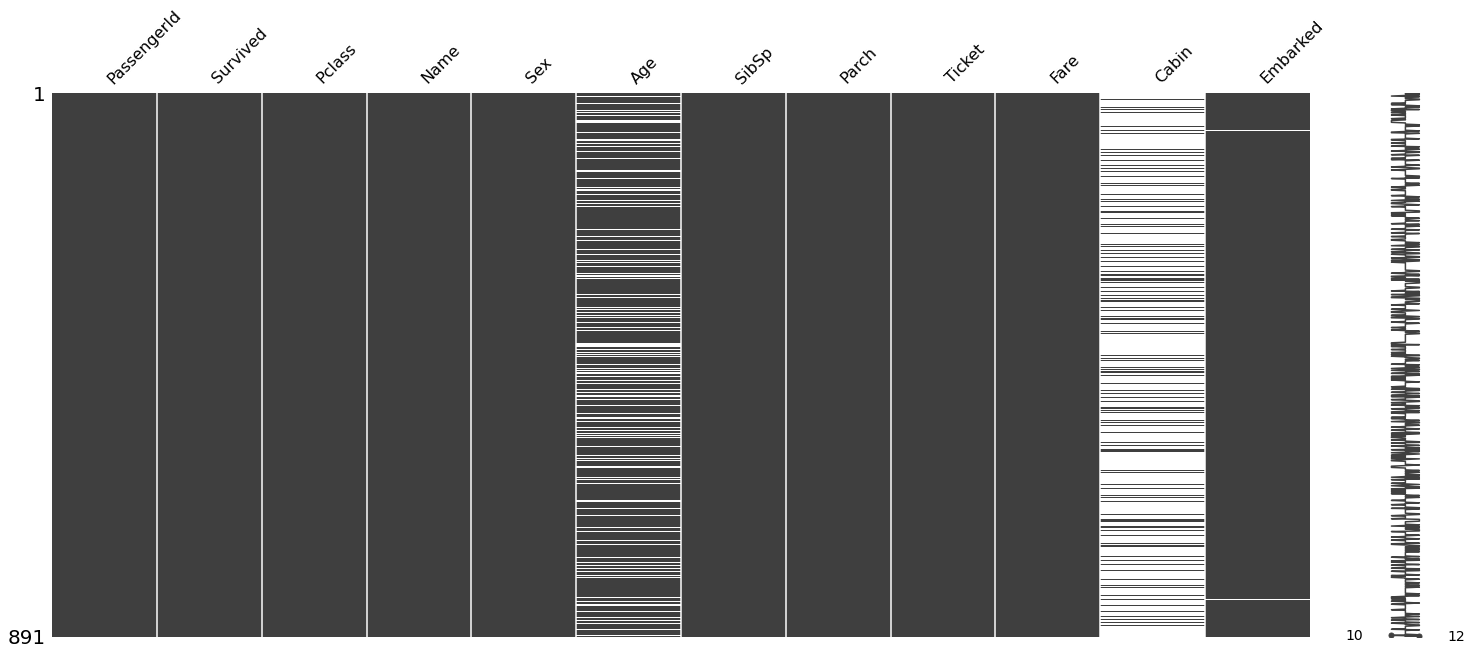

In [5]:
#find the missing data in the training data sets by columns
train.isnull().sum().sort_values()
#find the missing data in the testing data sets by columns
test.isnull().sum()
#diagnose the data via the missingno livrary
missingno.matrix(test)
missingno.matrix(train)

In [6]:
#summary stats for the train/test data sets

train.describe()
#test.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Feature Analysis:
We have both categorical and numerical variables

SEX : Categorical Value

In [7]:
#sex: categorical -> male or female
#performe a value count of the sex columnm

train['Sex'].value_counts(dropna=False) #dropna -> drop all na columns


male      577
female    314
Name: Sex, dtype: int64

In [8]:
#mean of survival by sex
train[['Sex', 'Survived']].groupby('Sex', as_index=False).mean().sort_values(by='Survived')

,Sex,Survived
1,male,0.188908
0,female,0.742038


Text(0.5, 1.0, 'Survicval Probability by Gender')

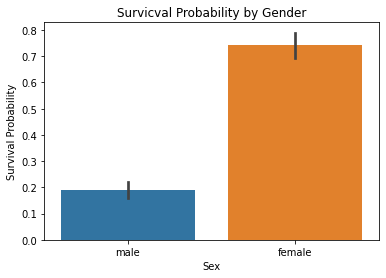

In [9]:
sns.barplot(x='Sex', y='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survicval Probability by Gender')

#its likely that women are more likely to survive than men

PASSANGER CLASS : Categorical Variable

In [10]:
#perform a value count by passanger class column

train['Pclass'].value_counts(dropna=False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [11]:
#the mean of survival by passanger class

train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Text(0.5, 1.0, 'Survival Probability by Passanger Class')

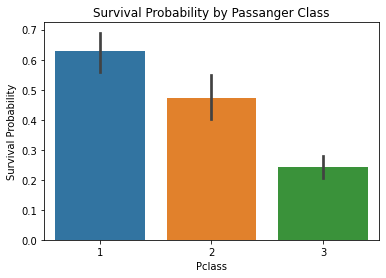

In [12]:
sns.barplot(x='Pclass', y='Survived',data=train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Passanger Class')

#passanger survival decreases with passsanger class
#first class passangers are more likely to be given first priority

Text(0.5, 1.0, 'Survival Prob. by Sex and Passanger Class')

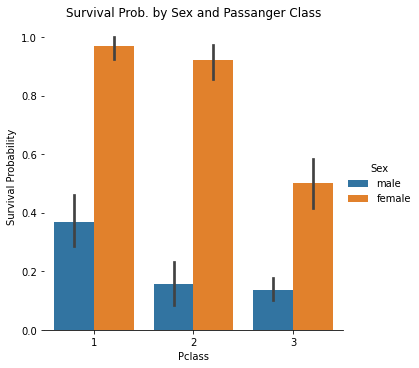

In [13]:
#survival by gender and passanger class
g = sns.factorplot(x='Pclass', y='Survived', hue='Sex', data=train, kind='bar')
g.despine(left=True)
plt.ylabel('Survival Probability')
plt.title('Survival Prob. by Sex and Passanger Class')

EMBARKED: Categorical Variable

In [14]:
#Value count for the Embarked Column

train['Embarked'].value_counts(dropna=False)

#two missing values from the embarked column

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [15]:
#mean of survival by point of embarkation

train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Text(0.5, 1.0, 'Survival probability by Point of Embarkation')

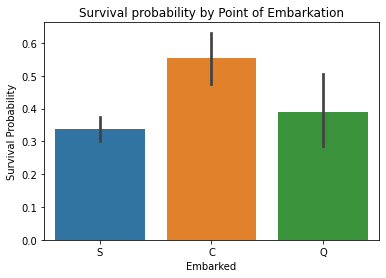

In [16]:
sns.barplot(x='Embarked', y='Survived', data=train)
plt.ylabel('Survival Probability')
plt.title('Survival probability by Point of Embarkation')
#probability of survival by those embarking for C is higher
#hypothetically, most of the first class passsangers were headed for C
# or most of the female were headed for C -> least probable hence eliminated
# or since S has te lowest survival prob., most that embarked for this location were third class
#passangers

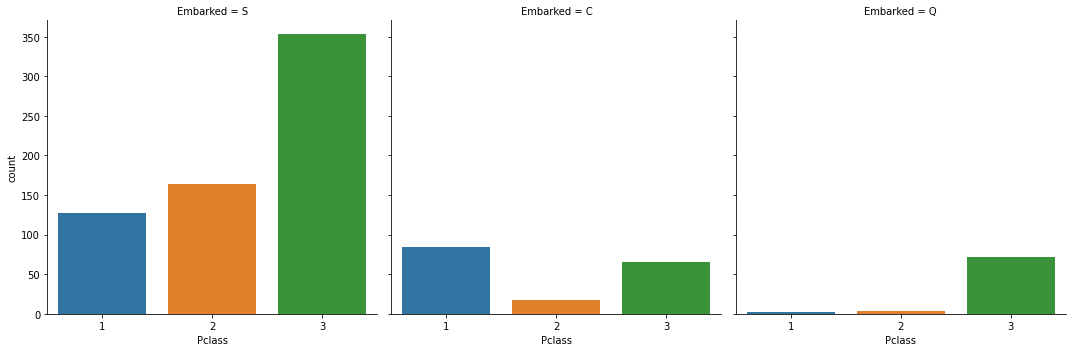

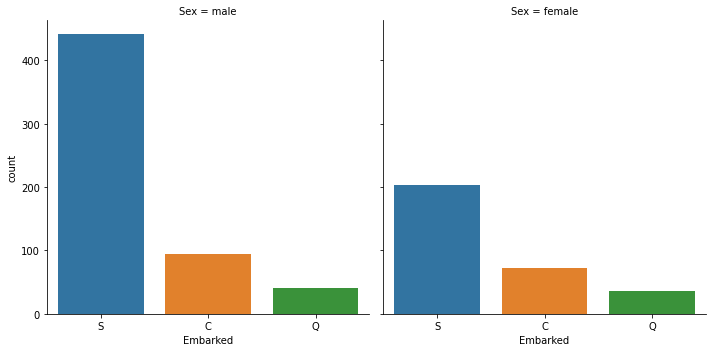

In [17]:
#to test the hypothesis -> plot passanger class count for each destination

sns.factorplot('Pclass', col='Embarked', data=train, kind='count')
sns.factorplot('Embarked', col='Sex', data = train, kind='count')

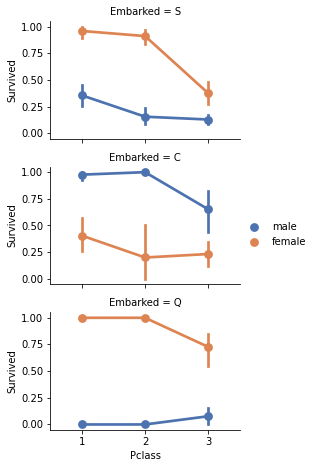

In [18]:
#survival probaility by all categoricak variables

grid = sns.FacetGrid(train, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

NUMERICAL VARIABLES: SiblingSpouse, ParentChildren, Age, Fare

In [19]:
#detect and remove outliers in numerical variables 
#outliers skew the data towards extreem and can cause inaccurate model prediction
#remove using the Tukey Method

def detect_outliers(df, n, features):
    """
    loop through the list of features and do away with data that is 1.5 times the inter-quatile
    range, this is done for each and every feature

    Using the list with outlier indices, we count the frequencies of the index numbers and if the 
    freq exceed n time, we return the list
    """

    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col],75)

        IQR = Q3-Q1
        outlier_step = 1.5*IQR
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col]>Q3+outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value >n)
    return multiple_outliers

outliers_to_drop = detect_outliers(train, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
print('We will drop these {} indices:'.format(len(outliers_to_drop)), outliers_to_drop)


We will drop these 10 indices: [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


In [20]:
#outliers in the numerical variables
train.loc[outliers_to_drop, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [21]:
#what are the dropped outliers and the reset index

print("Before: {} rows".format(len(train)))
train = train.drop(outliers_to_drop, axis=0).reset_index(drop=True)
print("After: {} rows".format(len(train)))

Before: 891 rows
After: 881 rows


Numerical Variable Correlation w/Survival

<AxesSubplot:>

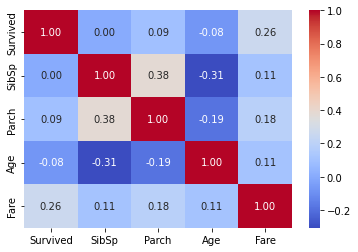

In [22]:
sns.heatmap(train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(),annot=True, fmt='.2f',cmap='coolwarm')

#fare seems to be the only feature with substantial correlation w/Survival

In [23]:
#value count of the SibSp column

train['SibSp'].value_counts(dropna = False)

0    608
1    209
2     28
4     18
3     13
5      5
Name: SibSp, dtype: int64

In [24]:
#mean of survival by SibSp
train[['SibSp', 'Survived']].groupby('SibSp',as_index= False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
4,4,0.166667
3,3,0.153846
5,5,0.000000


Text(0.5, 1.0, 'Survival Probability by SibSp')

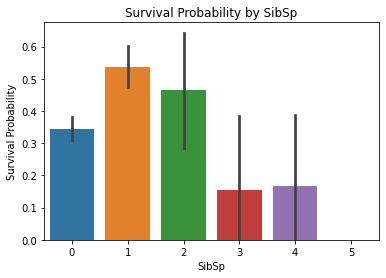

In [25]:
#survival probability by SibSp
sns.barplot(x='SibSp', y='Survived', data=train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by SibSp')

In [26]:
#numerical variable for parent and children

train['Parch'].value_counts(dropna=False)

0    678
1    118
2     70
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Text(0.5, 1.0, 'Srvival Probability by Parch')

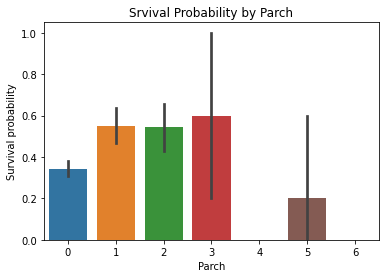

In [27]:
sns.barplot(x='Parch', y='Survived', data = train)
plt.ylabel('Survival probability')
plt.title('Srvival Probability by Parch')

Text(0.5, 1.0, 'Passanger Age Distribution')

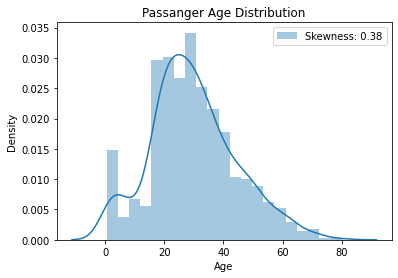

In [28]:
#numerical values in age column

train['Age'].isnull().sum()

#passanger age distribution
sns.distplot(train['Age'], label='Skewness: %.2f'%(train['Age'].skew()))
plt.legend(loc='best')
plt.title('Passanger Age Distribution')

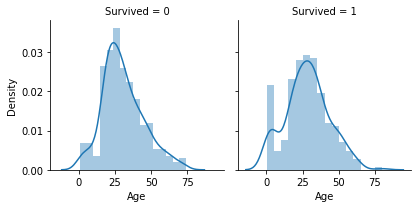

In [29]:
#age distribution by survival
g = sns.FacetGrid(train, col='Survived')
g.map(sns.distplot, 'Age')

Text(0.5, 1.0, 'Passanger Age Distribution by Survival')

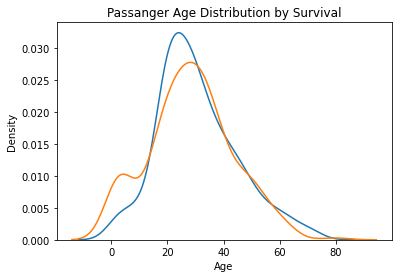

In [30]:
sns.kdeplot(train['Age'][train['Survived'] == 0], label = 'Did not Survive')
sns.kdeplot(train['Age'][train['Survived'] == 1], label = 'Survived')
plt.xlabel('Age')
plt.title('Passanger Age Distribution by Survival')

In [31]:
#how many null values do we have for vehicle fare
train['Fare'].isnull().sum()

0

Text(0, 0.5, 'Passanger Fare Distribution')

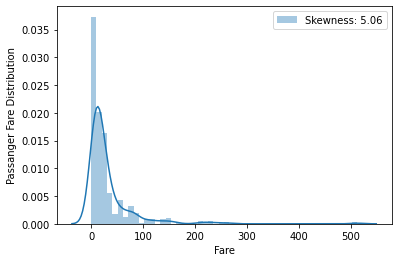

In [32]:
#therefore the Passsanger Fare distribution

sns.distplot(train['Fare'], label='Skewness: %.2f'%(train['Fare'].skew()))
plt.legend(loc='best')
plt.ylabel('Passanger Fare Distribution')

#we have an extreemly high skewness -> we will address during data preprocessing, log transformation

DATA PREPROCESSING

In [33]:
#drop the cabin and ticket features from training and test set

train = train.drop(['Ticket', 'Cabin'], axis=1)
test = test.drop(['Ticket', 'Cabin'], axis=1)

In [34]:
#Missing values in the training data set

train.isnull().sum().sort_values(ascending=False)

Age            170
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
dtype: int64

In [35]:
#compute the most frequent value of embarked in trainig set
mode = train['Embarked'].dropna().mode()[0]
mode

'S'

In [36]:
#fill the missing value in embark with mode
train['Embarked'].fillna(mode, inplace=True)

In [37]:
train.isnull().sum().sort_values(ascending=False)

Age            170
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [38]:
#find the missing values in test datasets
test.isnull().sum().sort_values(ascending=False)

Age            86
Fare            1
PassengerId     0
Pclass          0
Name            0
Sex             0
SibSp           0
Parch           0
Embarked        0
dtype: int64

In [39]:
#find the modal fair value: the most occuring and use it to fill the missing
mode = test['Fare'].dropna().mode()[0]
mode

#use this mode to fill the missing fare value
test['Fare'].fillna(mode, inplace=True)

#view the fill if successful
test.isnull().sum().sort_values(ascending=False)

Age            86
PassengerId     0
Pclass          0
Name            0
Sex             0
SibSp           0
Parch           0
Fare            0
Embarked        0
dtype: int64

In [40]:
#Combine the tarining set and the test set
combine = pd.concat([train, test],axis=0).reset_index(drop=True)
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [41]:
#find the missing value in the combined dataset
combine.isnull().sum().sort_values(ascending=False)

#all the survived are from the test
#we need to fill missing values in the Age column


Survived       418
Age            256
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [42]:
#encode sex: male=0, female=1

combine['Sex'] = combine['Sex'].map({'male':0, 'female' :1})

We need to find an age value that will fill the missing column

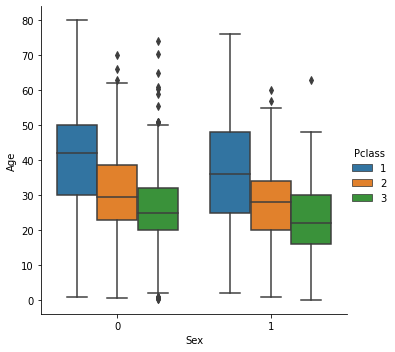

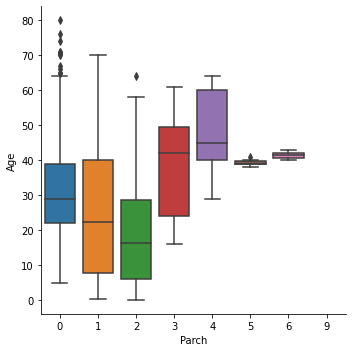

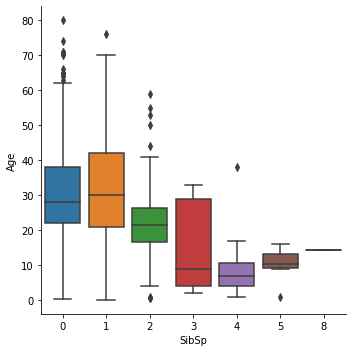

In [43]:
sns.factorplot(y='Age', x = 'Sex', hue='Pclass', kind='box', data=combine)
sns.factorplot(y='Age', x='Parch', kind='box', data=combine)
sns.factorplot(y='Age', x='SibSp', kind='box', data=combine)

<AxesSubplot:>

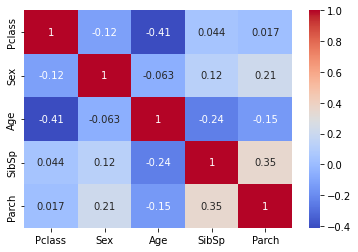

In [44]:
sns.heatmap(combine.drop(['Survived', 'Name', 'PassengerId', 'Fare'], axis=1).corr(), annot=True, cmap='coolwarm')

#age is not correlated with sex but is negatively correlated wih SibSp, Parch, Pclass
#-ve correlation: as one value increases, others decrease

In [45]:
#check the number of missing ages
age_nan_indices = list(combine[combine['Age'].isnull()].index)
len(age_nan_indices)

256

Loop through each missing age in the list to locate the rows that have the same SibSp, Parch, Pclass values and fill the missing age with the median of those rows

If the rows are not found fill the missing age with median of the entire age column

In [46]:
#loop through the list and impute missing ages
for index in age_nan_indices:
    median_age = combine['Age'].median()
    predict_age = combine['Age'][(combine['SibSp']==combine.iloc[index]['SibSp'])
                                & (combine['Parch']==combine.iloc[index]['Parch'])
                                & (combine['Pclass']==combine.iloc[index]['Pclass'])].median()

    if np.isnan(predict_age):
        combine['Age'].iloc[index] = median_age
    else:
        #print('Null')
        combine['Age'].iloc[index] = predict_age


#check for ages filled
combine['Age'].isnull().sum()

0

DATA TRANSFORMATION

Text(0.5, 1.0, 'Passenger Fare Distribution')

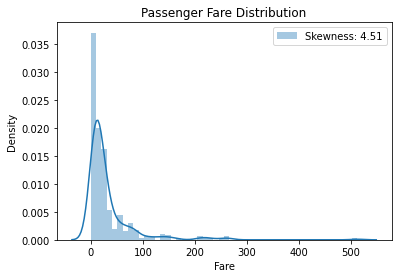

In [53]:
#passanger fare distribution has ultra-high skewness
sns.distplot(combine['Fare'], label = 'Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution')

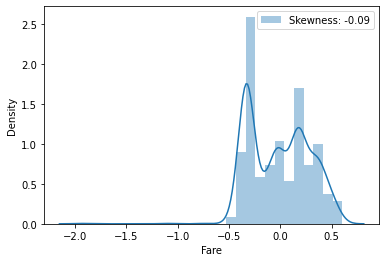

In [56]:
#apply log transformation to fare column to reduce skewness

combine['Fare'] = combine['Fare'].map(lambda x:np.log(x) if x > 0 else 0)

#fare distribution after log transformation

sns.distplot(combine['Fare'],label = 'Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc='best')

Feature Engineering:

Most important Art of machine learning
Create new features from existing features

In [61]:
#title feature 1
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,-0.380379,S,Mr. Owen Harris
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,0.372137,C,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,-0.318060,S,Miss. Laina
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,0.321586,S,Mrs. Jacques Heath (Lily May Peel)
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,-0.307761,S,Mr. William Henry


In [65]:
#get title from name
combine['Title'] = [name.split(',')[1].split('.')[0].strip() for name in combine['Name']]
combine[['Name','Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [68]:
combine['Title'].value_counts()

Mr              753
Miss            255
Mrs             197
Master           60
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

In [70]:
combine['Title'].nunique()

18

<AxesSubplot:xlabel='Title', ylabel='count'>

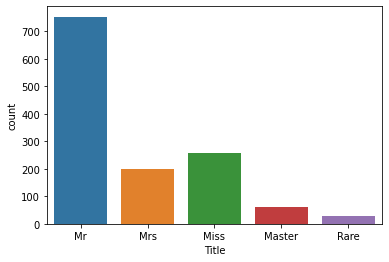

In [71]:
#simplify the titles

combine['Title'] = combine['Title'].replace(['Dr', 'Rev','Col','Major', 'Lady','Jonkheer', 'Don', 'Capt', 'the Countess',
                                             'Sir', 'Dona'], 'Rare')
combine['Title'] = combine['Title'].replace(['Mlle', 'Ms'], 'Miss')
combine['Title'] = combine['Title'].replace('Mme', 'Mrs')           

sns.countplot(combine['Title'])